c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\helen\OneDrive\Documents\GitHub\abT-gdT-cells-Team3\henv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


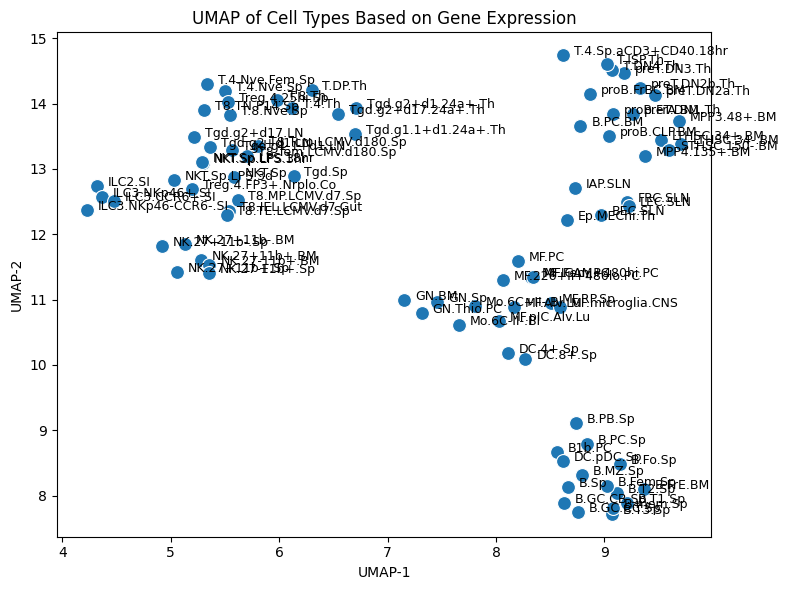

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

RNA_seq_path=r"C:\Users\helen\Downloads\datasets\mmc2.csv"
RNA_seq=pd.read_csv(RNA_seq_path,index_col=0)
RNA_seq_T=RNA_seq.T

RNA_seq_log = np.log1p(RNA_seq_T)  

scaler = StandardScaler()
RNA_seq_scaled = scaler.fit_transform(RNA_seq_log)

reducer = umap.UMAP(random_state=42)
umap_RNA_prep= reducer.fit_transform(RNA_seq_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_RNA_prep[:, 0], y=umap_RNA_prep[:, 1], s=100)


for i, label in enumerate(RNA_seq_T.index):
    plt.text(umap_RNA_prep[i, 0]+0.1, umap_RNA_prep[i, 1], label, fontsize=9)

plt.title("UMAP of Cell Types Based on Gene Expression")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()

Now that we have our UMAP we will perform and compare the elbow and silhouette method to determine the optimal amount of clusters for kmeans clustering

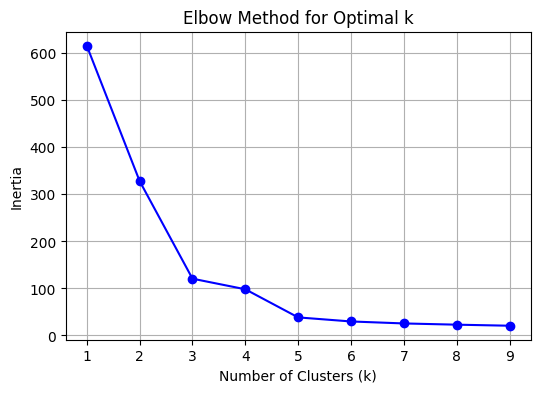

In [38]:
#elbow method to determine amount of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(umap_RNA_prep)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

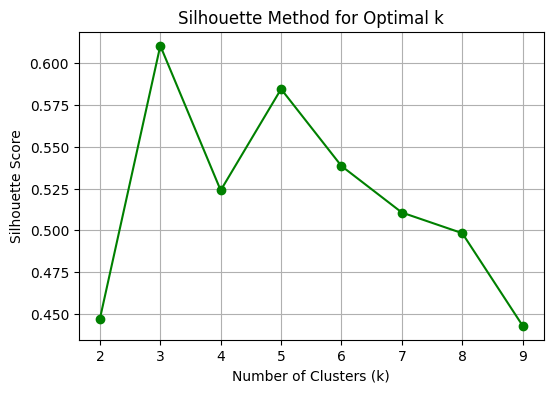

In [39]:
#test silhouette sore for kmeans clusterin
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):  # must be ≥2
    kmeans = KMeans(n_clusters=k, random_state=42).fit(umap_RNA_prep)
    labels = kmeans.labels_
    score = silhouette_score(umap_RNA_prep, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()

-> 3 and 5 both seem to be a good number of clusters, as they both show elbows in the elbow method and have local peaks in their silhouette score. This might signify that cells can be divided into 3 main groups that can be further divided into 5 subgroups

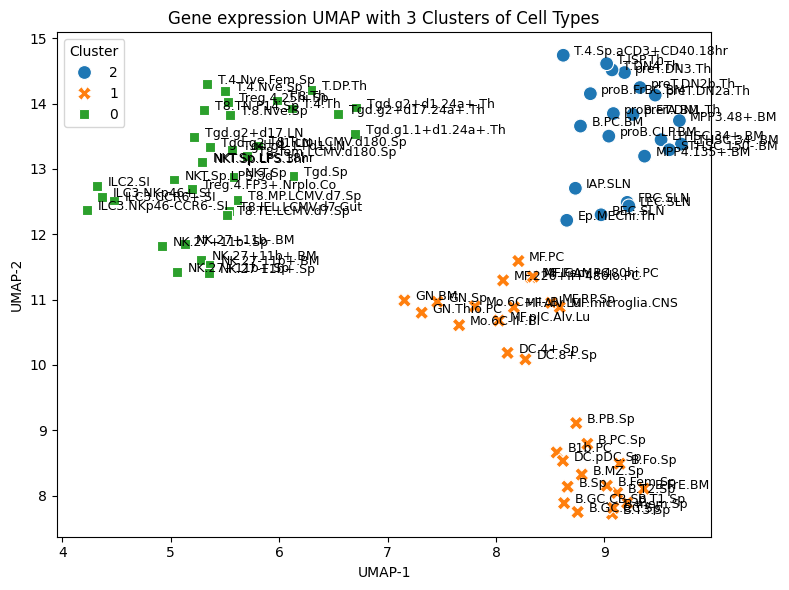

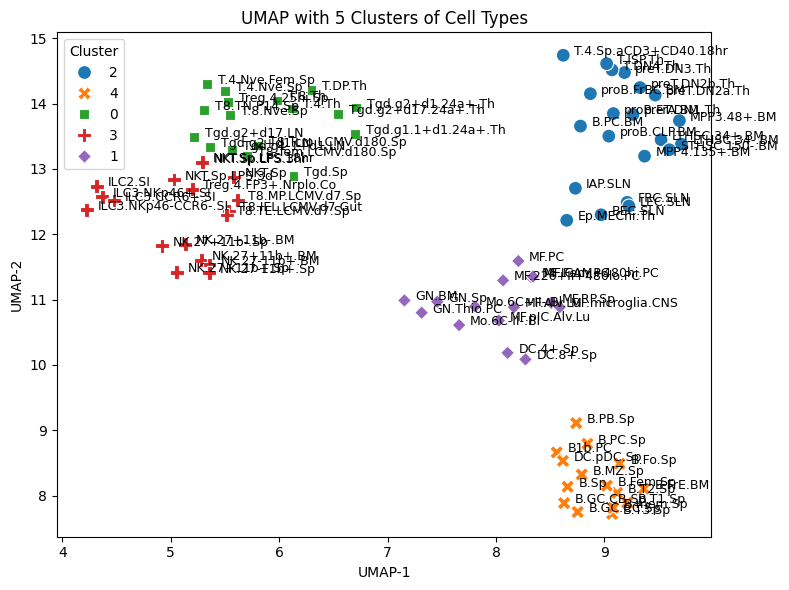


KMeans Clustering Summary (k=3):


,kmeans3,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."
2,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."



KMeans Clustering Summary (k=5):


,kmeans5,CellType
0,0,"[T.DP.Th, T.4.Th, T.8.Th, T.4.Nve.Sp, T.4.Nve...."
1,1,"[GN.BM, GN.Sp, GN.Thio.PC, Mo.6C+II-.Bl, Mo.6C..."
2,2,"[LTHSC.34-.BM, LTHSC.34+.BM, STHSC.150-.BM, MP..."
3,3,"[Treg.4.FP3+.Nrplo.Co, T8.IEL.LCMV.d7.Gut, T8...."
4,4,"[B.FrE.BM, B1b.PC, B.T1.Sp, B.T2.Sp, B.T3.Sp, ..."


In [40]:
from sklearn.cluster import KMeans

# Prepare DataFrame
umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
umap_RNA_seq["CellType"] = RNA_seq_T.index

# kmeans with 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=42)
umap_RNA_seq["kmeans3"] = kmeans3.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans3", style="kmeans3", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=9)

plt.title("Gene expression UMAP with 3 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# kmeans with 5 clusters
kmeans5 = KMeans(n_clusters=5, random_state=42)
umap_RNA_seq["kmeans5"] = kmeans5.fit_predict(umap_RNA_prep).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_RNA_seq, x="UMAP1", y="UMAP2", hue="kmeans5", style="kmeans5", s=100, palette="tab10")

for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["CellType"], fontsize=9)

plt.title("UMAP with 5 Clusters of Cell Types")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# table view of cell types
for k in [3, 5]:
    cluster_col = f"kmeans{k}"
    kmeans_summary = umap_RNA_seq.groupby(cluster_col)["CellType"].apply(list).reset_index()
    print(f"\nKMeans Clustering Summary (k={k}):")
    display(kmeans_summary)


now we will perform leiden clustering to see how it compares

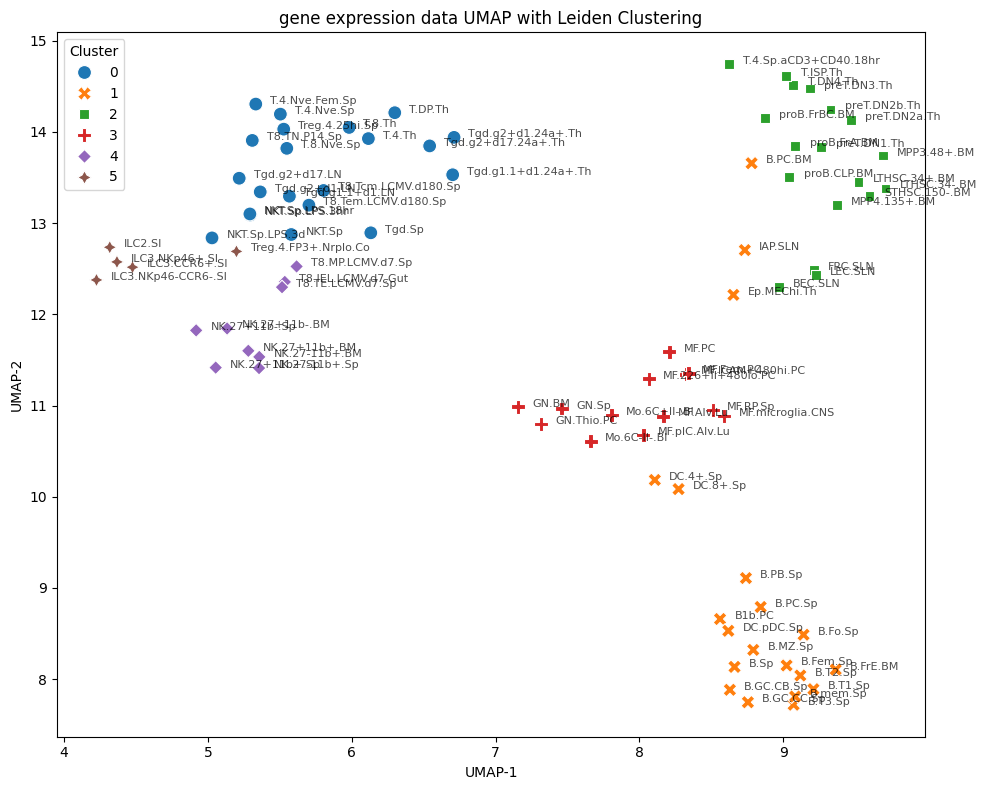

In [41]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns

umap_RNA_seq = pd.DataFrame(umap_RNA_prep, columns=["UMAP1", "UMAP2"], index=RNA_seq_T.index)
adata = ad.AnnData(X=RNA_seq_T.values)
adata.obs_names = RNA_seq_T.index
adata.obsm["X_umap"] = umap_RNA_prep

sc.pp.neighbors(adata, use_rep="X", n_neighbors=10, random_state=42)
sc.tl.leiden(adata, resolution=1.0)

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].values

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=umap_RNA_seq, x="UMAP1", y="UMAP2",
    hue="Leiden_Cluster", style="Leiden_Cluster",
    s=100, palette="tab10"
)
for i, row in umap_RNA_seq.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row.name, fontsize=8, alpha=0.7)

plt.title("gene expression data UMAP with Leiden Clustering")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


we will visualize grouped cell types in a table and countplot

C:\Users\helen\AppData\Local\Temp\ipykernel_38636\2095652259.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))
C:\Users\helen\AppData\Local\Temp\ipykernel_38636\2095652259.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))
C:\Users\helen\AppData\Local\Temp\ipykernel_38636\2095652259.py:14: FutureWarning: 

Passing `


Cluster 0:
  - T.DP.Th
  - T.4.Th
  - T.8.Th
  - T.4.Nve.Sp
  - T.4.Nve.Fem.Sp
  - T.8.Nve.Sp
  - Treg.4.25hi.Sp
  - T8.TN.P14.Sp
  - T8.Tcm.LCMV.d180.Sp
  - T8.Tem.LCMV.d180.Sp
  - NKT.Sp
  - NKT.Sp.LPS.3hr
  - NKT.Sp.LPS.18hr
  - NKT.Sp.LPS.3d
  - Tgd.g2+d17.24a+.Th
  - Tgd.g2+d17.LN
  - Tgd.g2+d1.24a+.Th
  - Tgd.g2+d1.LN
  - Tgd.g1.1+d1.24a+.Th
  - Tgd.g1.1+d1.LN
  - Tgd.Sp

Cluster 1:
  - B.FrE.BM
  - B1b.PC
  - B.T1.Sp
  - B.T2.Sp
  - B.T3.Sp
  - B.Sp
  - B.Fem.Sp
  - B.MZ.Sp
  - B.Fo.Sp
  - B.mem.Sp
  - B.GC.CB.Sp
  - B.GC.CC.Sp
  - B.PB.Sp
  - B.PC.Sp
  - B.PC.BM
  - DC.4+.Sp
  - DC.8+.Sp
  - DC.pDC.Sp
  - IAP.SLN
  - Ep.MEChi.Th

Cluster 2:
  - LTHSC.34-.BM
  - LTHSC.34+.BM
  - STHSC.150-.BM
  - MPP4.135+.BM
  - proB.CLP.BM
  - proB.FrA.BM
  - proB.FrBC.BM
  - preT.DN1.Th
  - preT.DN2a.Th
  - preT.DN2b.Th
  - preT.DN3.Th
  - T.DN4.Th
  - T.ISP.Th
  - T.4.Sp.aCD3+CD40.18hr
  - MPP3.48+.BM
  - FRC.SLN
  - BEC.SLN
  - LEC.SLN

Cluster 3:
  - GN.BM
  - GN.Sp
  - GN.Thio.PC
  - Mo.

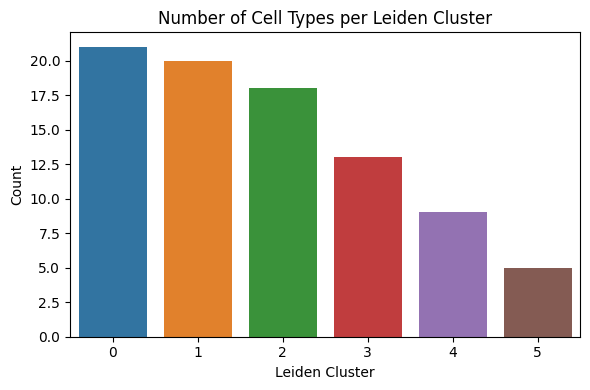

KeyError: 'Column not found: CellType'

In [ ]:

leiden_col = "Leiden_Cluster"
if leiden_col not in umap_RNA_seq.columns:
    umap_RNA_seq[leiden_col] = adata.obs["leiden"].values

clustered_cell_types = umap_RNA_seq.groupby(leiden_col).apply(lambda RNA_seq: list(RNA_seq.index))

for cluster, cells in clustered_cell_types.items():
    print(f"\nCluster {cluster}:")
    for cell in cells:
        print(f"  - {cell}")

plt.figure(figsize=(6, 4))
sns.countplot(x=leiden_col, data=umap_RNA_seq, palette="tab10")
plt.title("Number of Cell Types per Leiden Cluster")
plt.xlabel("Leiden Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

umap_RNA_seq["Leiden_Cluster"] = adata.obs["leiden"].astype(str).reindex(umap_RNA_seq.index)
leiden_summary = umap_RNA_seq.groupby(leiden_col)["CellType"].apply(list).reset_index()
print("\nLeiden Clustering Summary:")
display(leiden_summary)


now we will compare clustering via umap and kmeans

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans5_labels = kmeans5.fit_predict(umap_embedding)
umap_RNA_seq["KMeans_Cluster"] = kmeans5_labels.astype(str)

ari = adjusted_rand_score(umap_RNA_seq["Leiden_Cluster"], umap_RNA_seq["KMeans_Cluster"])
nmi = normalized_mutual_info_score(umap_RNA_seq["Leiden_Cluster"], umap_RNA_seq["KMeans_Cluster"])

print(f"Adjusted Rand Index (KMeans vs. Leiden): {ari:.3f}")
print(f"Normalized Mutual Information (KMeans vs. Leiden): {nmi:.3f}")

Adjusted Rand Index (KMeans vs. Leiden): 0.706
Normalized Mutual Information (KMeans vs. Leiden): 0.796
